AdaBoosting 
原理参考
知乎：手把手教你AdaBoost

In [821]:
#定义训练数据[x,y]
import numpy as np
import math
N=10
x=list(range(0,10))
lenx=len(x)
# print(len(x))=10
y=[1,1,1,-1,-1,-1,1,1,1,-1]
[x,y]

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 1, -1, -1, -1, 1, 1, 1, -1]]

基学习算法：二分类器

# 第一个个体学习器：

首先认为所有x_{i},i=1,2,...,10的权重是一样的，即每一个数据同等重要（权重用来计算误差）

In [822]:
#1、更新权重
w_1=[0.1]*10
public_w=w_1


In [823]:
import pandas as pd
#将x,y,w_1,封装进data中,并显示数据分布
def training_data(x,y,w):
    pd.set_option('display.float_format', '{:.3f}'.format)
 
    data={'输入':x,'权重':w,'输出':y}
    df=pd.DataFrame(data).T
    print(df)
    return
training_data(x,y,w_n)

       0     1     2      3      4      5     6     7     8      9
输入 0.000 1.000 2.000  3.000  4.000  5.000 6.000 7.000 8.000  9.000
权重 0.100 0.100 0.100  0.100  0.100  0.100 0.100 0.100 0.100  0.100
输出 1.000 1.000 1.000 -1.000 -1.000 -1.000 1.000 1.000 1.000 -1.000


In [824]:
#设置阈值
print(x)
thetas=[i-0.5 for i in x]
thetas.append(9.5)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [825]:
#阈值判定
def func_thetas(thetas,x):
    y_all_theta_positive=[]
    y_all_theta_negitive=[]
    for i in thetas:
        y_one_theta=[]
        y_one_theta_ng=[]
        for j in x:
            if j<i:
                y_one_theta.append(1)
                y_one_theta_ng.append(-1)
            else:
                y_one_theta.append(-1)
                y_one_theta_ng.append(1)
        y_all_theta_positive.append(y_one_theta)
        y_all_theta_negitive.append(y_one_theta_ng)
    return y_all_theta_positive,y_all_theta_negitive
y_all_theta_positive,y_all_theta_negitive=func_thetas(thetas,x)


In [826]:
#计算分类误差
def func_class_error(y,y_pre,w_n):
    count=[]
    error_w_min=[]
    for i in range(len(thetas)):#计算每个阈值下的分类误差，遍历的阈值数
        count_i=0
        error_w=0
        y_theta=y_pre[i]#取当前阈值下的预测值
        for j in range(len(y)):#计算当前下的分类误差
            if y[j]!=y_theta[j]:
                count_i+=1
                error_w+=w_n[j]
        count.append(count_i/10)
        error_w_min.append(error_w)
    return count,error_w_min

count,error_w=func_class_error(y,y_all_theta_positive,public_w)
data2=pd.DataFrame({'阈值':thetas,'错误率':count,'权重和':error_w}).T
data2
        

,0,1,2,3,4,5,6,7,8,9,10
阈值,-0.500,0.500,1.500,2.500,3.500,4.500,5.500,6.500,7.500,8.500,9.500
错误率,0.600,0.500,0.400,0.300,0.400,0.500,0.600,0.500,0.400,0.300,0.400
权重和,0.600,0.500,0.400,0.300,0.400,0.500,0.600,0.500,0.400,0.300,0.400


In [827]:
#得到分类误差最小的阈值的权重和
def func_get_w(count,error_w):
    count_min=count[0]
    weight_min=error_w[0]
    theta=0
    for i in range(len(count)):
        if count[i]<count_min:
            if error_w[i]>0.5:
                continue
            theta=thetas[i]
            count_min=count[i]
            weight_min=error_w[i]
    return theta,count_min,round(weight_min,6)
t,cm,wm=func_get_w(count,error_w)
[t,cm,wm]

[2.5, 0.3, 0.3]

In [828]:
#获得最佳阈值对应预测列表-来得到学习表示函数
#就是得到v=2.5下相对应y_all_theta_positive的一列表
def get_all_theta_positive(theta,thetas):
    n=thetas.index(theta)
    return y_all_theta_positive[n]
G_n=get_all_theta_positive(t,thetas)
# G_n

(b).计算系数$\alpha$，当误差小于0.5，$\alpha>0$

In [829]:
def get_alpha(sumw):
    a_n=round(0.5*math.log((1-sumw)/sumw),7)
    return a_n
a_n=get_alpha(wm)
a_n

0.4236489

(c).更新训练数据的权值分布

In [830]:
def func_update_weight(a1,G_n,w_n):
    w_news=[]
    for i in range(len(x)):
        w_new=w_n[i]*math.exp(-1*a1*y[i]*G_n[i])
#         w_new=round(w_new,6)
        w_news.append(w_new)
    sum=0
    for i in w_news:
        sum+=i
    w_news=[round(i/sum,6) for i in w_news]
    return w_news;
public_w=func_update_weight(a_n,G_n,public_w)

In [831]:
#变更权重后的训练数据
# data2={'新权重':w_news}
# df=pd.DataFrame(data2).T
# df
training_data(x,y,public_w)

       0     1     2      3      4      5     6     7     8      9
输入 0.000 1.000 2.000  3.000  4.000  5.000 6.000 7.000 8.000  9.000
权重 0.071 0.071 0.071  0.071  0.071  0.071 0.167 0.167 0.167  0.071
输出 1.000 1.000 1.000 -1.000 -1.000 -1.000 1.000 1.000 1.000 -1.000


In [832]:
#计算第一个模型加权后的预测：
def func_f(x,a_n,G_n):
    output=[]
    for i in range(len(x)):
        val=a_n*G_n[i]
        output.append(val)
    return output
output_n=func_f(x,a_n,G_n)
output_n

[0.4236489,
 0.4236489,
 0.4236489,
 -0.4236489,
 -0.4236489,
 -0.4236489,
 -0.4236489,
 -0.4236489,
 -0.4236489,
 -0.4236489]

-----------------------

# 第二个学习器;

In [833]:
#1、获取训练数据分布
training_data(x,y,public_w)

       0     1     2      3      4      5     6     7     8      9
输入 0.000 1.000 2.000  3.000  4.000  5.000 6.000 7.000 8.000  9.000
权重 0.071 0.071 0.071  0.071  0.071  0.071 0.167 0.167 0.167  0.071
输出 1.000 1.000 1.000 -1.000 -1.000 -1.000 1.000 1.000 1.000 -1.000


In [834]:
def get_coefficent_positive(y,y_all_theta_positive,public_w,thetas):
    count,error_w=func_class_error(y,y_all_theta_positive,public_w)#计算分类误差
    
#     print("count+error_w")
#     print(pd.DataFrame({"分错数:":[count],"误差率":[error_w]}).T)
    theta,count_min,w_min=func_get_w(count,error_w) #计算权重和
#     print("theta+count_min+w_min")
#     print(pd.DataFrame({"阈值":[theta],"分错数":[count_min],"权重和":[w_min]}).T)
    G_n=get_all_theta_positive(theta,thetas) #计算学习器函数
    a_n=get_alpha(w_min)#计算系数
    return a_n,G_n


#2、计算系数和学习器函数
a_n,G_n=get_coefficent_positive(y,y_all_theta_positive,public_w,thetas)
print(a_n)

#3、更新权重
public_w=func_update_weight(a_n,G_n,public_w)
training_data(x,y,public_w)
#4、计算加入第二个模型后的预测值
output=func_f(x,a_n,G_n)
output_n=[x+y for x,y in zip(output,output_n)]#zip联系两个列表
print(output_n)

0.6496377
       0     1     2      3      4      5     6     7     8      9
输入 0.000 1.000 2.000  3.000  4.000  5.000 6.000 7.000 8.000  9.000
权重 0.045 0.045 0.045  0.167  0.167  0.167 0.106 0.106 0.106  0.045
输出 1.000 1.000 1.000 -1.000 -1.000 -1.000 1.000 1.000 1.000 -1.000
[1.0732865999999999, 1.0732865999999999, 1.0732865999999999, 0.2259888, 0.2259888, 0.2259888, 0.2259888, 0.2259888, 0.2259888, -1.0732865999999999]


# 第三个学习器
注意此处分类是大于阈值

In [835]:
#1、获取数据分布
training_data(x,y,public_w)


       0     1     2      3      4      5     6     7     8      9
输入 0.000 1.000 2.000  3.000  4.000  5.000 6.000 7.000 8.000  9.000
权重 0.045 0.045 0.045  0.167  0.167  0.167 0.106 0.106 0.106  0.045
输出 1.000 1.000 1.000 -1.000 -1.000 -1.000 1.000 1.000 1.000 -1.000


In [836]:
#2、计算系数和学习器函数
def get_prediction(x,y,thetas):
    pre_all_theta=[]
    for i in thetas:
        pre=[]
        for j in x:
            if j>i:
                pre.append(1)
            else:
                pre.append(-1)
        pre_all_theta.append(pre)
    return pre_all_theta
pre_all_theta=get_prediction(x,y,thetas)
# print(pre_all_theta,len(pre_all_theta))

def get_class_error(y,pre_all_theta):
    count_all=[]
    weight_sum_all=[]
    for i in range(len(pre_all_theta)):
        pre=pre_all_theta[i]
        count=0
        weight=0
        for j in range(len(y)):
            if y[j]!=pre[j]:
                count+=1
                weight+=public_w[j]
        count_all.append(count/10)
        weight_sum_all.append(weight)
    return count_all,weight_sum_all#返回分错率和权重和
count_all,weight_sum_all=get_class_error(y,pre_all_theta)
print(count_all,weight_sum_all)

def get_min_weight(count_all,weight_sum_all,thetas):
    minc=count_all[0]
    minw=weight_sum_all[0]
    theta=0
    for i in range(len(count_all)):
        if count_all[i]<=minc:
            if weight_sum_all[i]>0.5:
                continue
            minc=count_all[i]
            minw=weight_sum_all[i]
            theta=thetas[i]
    return minc,minw,theta
minc,minw,t=get_min_weight(count_all,weight_sum_all,thetas)
print(minc,minw,t)

#计算系数和学习器函数式
a_n=get_alpha(minw)
def get_G_n(theta,thetas):
    n=thetas.index(theta)
    return pre_all_theta[n]
G_n=get_G_n(t,thetas)

print(a_n,G_n)

[0.4, 0.5, 0.6, 0.7, 0.6, 0.5, 0.4, 0.5, 0.6, 0.7, 0.6] [0.5454530000000001, 0.590908, 0.636363, 0.681818, 0.515152, 0.3484860000000001, 0.18182, 0.28788100000000005, 0.39394200000000007, 0.5000030000000001, 0.45454800000000006]
0.4 0.18182 5.5
0.7520326 [-1, -1, -1, -1, -1, -1, 1, 1, 1, 1]


In [837]:
#3、更新权重
public_w=func_update_weight(a_n,G_n,public_w)
training_data(x,y,public_w)
# #4、计算加入第三个模型后的预测值
output=func_f(x,a_n,G_n)
output_n=[x+y for x,y in zip(output,output_n)]
df=pd.DataFrame({'f3（x）':output_n}).T
df

       0     1     2      3      4      5     6     7     8      9
输入 0.000 1.000 2.000  3.000  4.000  5.000 6.000 7.000 8.000  9.000
权重 0.125 0.125 0.125  0.102  0.102  0.102 0.065 0.065 0.065  0.125
输出 1.000 1.000 1.000 -1.000 -1.000 -1.000 1.000 1.000 1.000 -1.000


,0,1,2,3,4,5,6,7,8,9
f3（x）,0.321,0.321,0.321,-0.526,-0.526,-0.526,0.978,0.978,0.978,-0.321


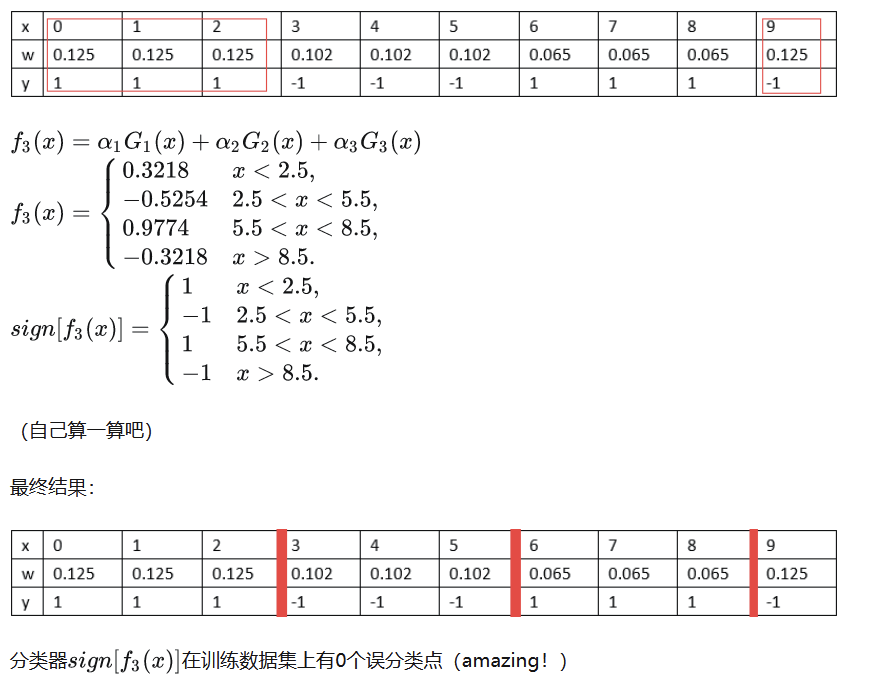